In [4]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

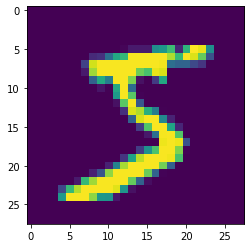

In [7]:
plt.imshow(X_train[0])

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
def show(X,Q_train,W_test):
    plt.imshow(Q_train[X])
    print(W_test[X])

3


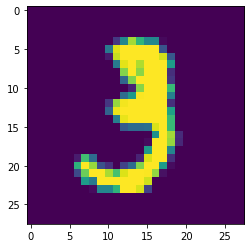

In [12]:
show(10,X_train,y_train)

In [13]:
X_train=X_train/255
X_test=X_test/255

In [20]:
X_test.shape

(10000, 28, 28)

In [31]:
CNN=keras.Sequential([
    keras.layers.Conv1D(filters=32,kernel_size=(3),activation="relu",input_shape=(28,28)),
    keras.layers.MaxPooling1D((2)),
    keras.layers.Conv1D(filters=64,kernel_size=(3),activation="relu",input_shape=(28,28)),
    keras.layers.MaxPooling1D((2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation="softmax")
    
    
])

In [34]:
CNN.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=["accuracy"])

In [35]:
CNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2130 - accuracy: 0.9375
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0743 - accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0531 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0428 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0351 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0294 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0229 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0199 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [41]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9872


[0.04301520064473152, 0.9872000217437744]

In [42]:
Y_pred1=CNN.predict(X_test)

In [43]:
Y_class=[np.argmax(element) for element in Y_pred1]

In [49]:
Y_class[18]

5

In [48]:
y_test[18]

3

6


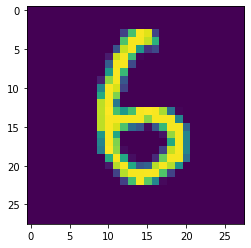

In [51]:
show(21,X_test,Y_class)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,Y_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       1.00      0.97      0.98       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(69.0, 0.5, 'Truth')

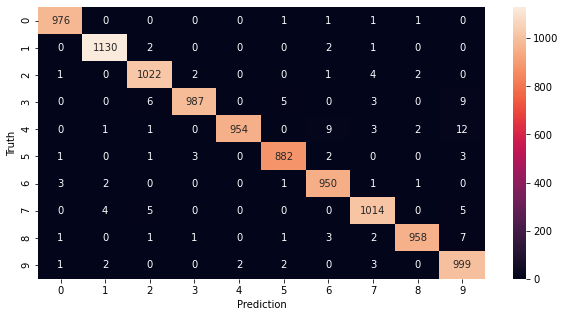

In [56]:
import seaborn as sns
cn=tf.math.confusion_matrix(labels=y_test,predictions=Y_class)
plt.figure(figsize=(10,5))
sns.heatmap(cn,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")